In [2]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
print(X_train.shape)

(60000, 28, 28)


In [8]:
X_train[0].min(), X_train[0].max()

(0, 255)

In [9]:
X_train = (X_train - 0.0) / (255.0 - 0.0)
X_test = (X_test - 0.0) / (255.0 - 0.0)
X_train[0].min(), X_train[0].max()

(0.0, 1.0)

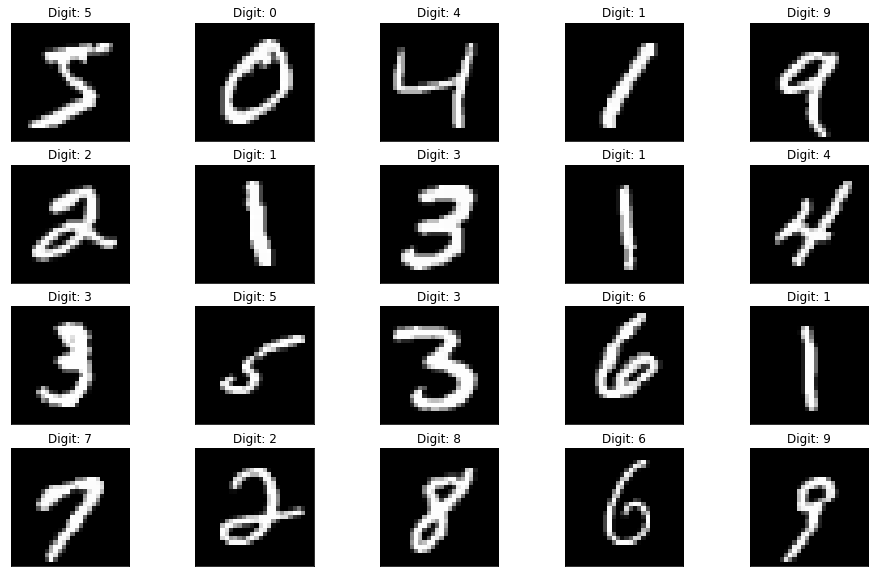

In [10]:
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.title(f"Digit: {digit}")
    plt.xticks([])
    plt.yticks([])
plt.figure(figsize=(16, 10))
for i in range(20):
    plot_digit(X_train[i], y_train[i], plt, i)   
plt.show()

In [11]:
X_train = X_train.reshape((X_train.shape + (1,)))
X_test = X_test.reshape((X_test.shape + (1,)))

In [12]:
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [13]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax")
])

In [14]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
    optimizer=optimizer, 
    loss="sparse_categorical_crossentropy", 
    metrics=["accuracy"]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542230 (2.07 MB)
Trainable params: 542230 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [15]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 41s 21ms/step - loss: 0.2349 - accuracy: 0.9291
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0759 - accuracy: 0.9774
Epoch 3/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0493 - accuracy: 0.9848
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0354 - accuracy: 0.9892
Epoch 5/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0263 - accuracy: 0.9919
Epoch 6/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0205 - accuracy: 0.9936
Epoch 7/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0142 - accuracy: 0.9956
Epoch 8/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0115 - accuracy: 0.9966
Epoch 9/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0078 - accuracy: 0.9980
Epoch 10/10
1875/1875 [==============================] - 41s 22m

1/1 [==============================] - 0s 55ms/step


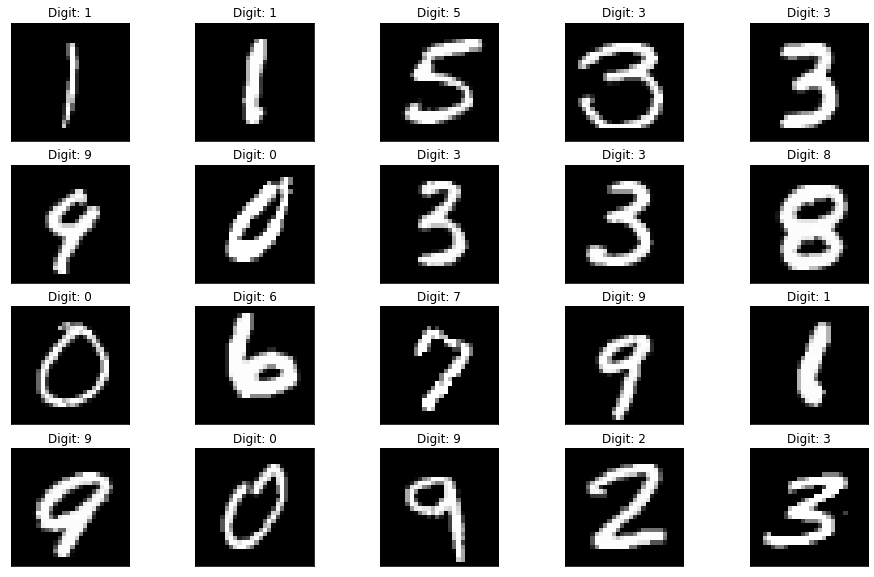

In [16]:
plt.figure(figsize=(16, 10))
for i in range(20):
    image = random.choice(X_test).squeeze()
    digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1)
    plot_digit(image, digit, plt, i)
plt.show()

In [21]:
predictions = np.argmax(model.predict(X_test), axis=-1)
accuracy_score(y_test, predictions)

313/313 [==============================] - 3s 9ms/step


0.9876

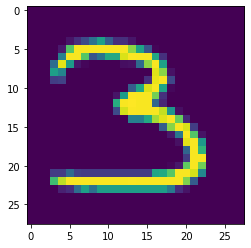

In [18]:
n=random.randint(0,9999)
plt.imshow(X_test[n])
plt.show()

In [19]:
predicted_value=model.predict(X_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

313/313 [==============================] - 3s 8ms/step
Handwritten number in the image is= 3


In [20]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0]) #Test loss: 0.0296396646054
print('Test accuracy:', score[1])

Test loss: 0.04312948137521744
Test accuracy: 0.9876000285148621
